# Numerical methods for 2nd-order ODEs

We've gone over how to solve 1st-order ODEs using numerical methods, but what about 2nd-order or any higher-order ODEs? We can use the same methods we've already discussed by transforming our higher-order ODEs into a **system of first-order ODEs**.

Meaning, if we are given a 2nd-order ODE
\begin{equation}
\frac{d^2 y}{dx^2} = y^{\prime\prime} = f(x, y, y^{\prime})
\end{equation}
we can transform this into a system of **two 1st-order ODEs** that are coupled:
\begin{align}
\frac{dy}{dx} &= y^{\prime} = u \\
\frac{du}{dx} &= u^{\prime} = y^{\prime\prime} = f(x, y, u)
\end{align}
where $f(x, y, u)$ is the same as that given above for $\frac{d^2 y}{dx^2}$.

Thus, instead of a 2nd-order ODE to solve, we have two 1st-order ODEs:
\begin{align}
y^{\prime} &= u \\
u^{\prime} &= f(x, y, u)
\end{align}

So, we can use all of the methods we have talked about so far to solve 2nd-order ODEs by transforming the one equation into a system of two 1st-order equations.

## Higher-order ODEs

This works for higher-order ODEs too! For example, if we have a 3rd-order ODE, we can transform it into a system of three 1st-order ODEs:
\begin{align}
\frac{d^3 y}{dx^3} &= f(x, y, y^{\prime}, y^{\prime\prime}) \\
\rightarrow y^{\prime} &= u \\
u^{\prime} &= y^{\prime\prime} = w \\
w^{\prime} &= y^{\prime\prime\prime} = f(x, y, u, w)
\end{align}

## Example: mass-spring problem

For example, let's solve a forced damped mass-spring problem given by a 2nd-order ODE:
\begin{equation}
y^{\prime\prime} + 5y^{\prime} + 6y = 10 \sin \omega t
\end{equation}
with the initial conditions $y(0) = 0$ and $y^{\prime}(0) = 5$.

We start by transforming the equation into two 1st-order ODEs. Let's use the variables $z_1 = y$ and $z_2 = y^{\prime}$:
\begin{align}
\frac{dz_1}{dt} &= z_1^{\prime} = z_2 \\
\frac{dz_2}{dt} &= z_2^{\prime} = y^{\prime\prime} = 10 \sin \omega t - 5z_2 - 6z_1
\end{align}

### Forward Euler

Then, let's solve numerically using the forward Euler method. Recall that the recursion formula for forward Euler is:
\begin{equation}
y_{i+1} = y_i + \Delta x f(x_i, y_i)
\end{equation}
where $f(x,y) = \frac{dy}{dx}$.

Let's solve using $\omega = 1$ and with a step size of $\Delta t = 0.1$, over $0 \leq t \leq 3$.

We can compare this against the exact solution, obtainable using the method of undetermined coefficients:
\begin{equation}
y(t) = -6 e^{-3t} + 7 e^{-2t} + \sin t - \cos t
\end{equation}

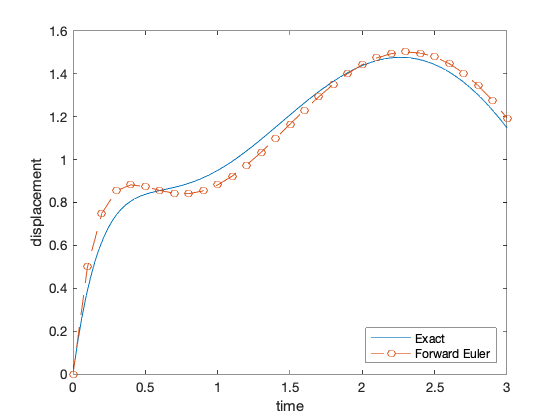

In [9]:
% plot exact solution first
t = linspace(0, 3);
y_exact = -6*exp(-3*t) + 7*exp(-2*t) + sin(t) - cos(t);
plot(t, y_exact); hold on

omega = 1;

dt = 0.1;
t = [0 : dt : 3];

f = @(t,z1,z2) 10*sin(omega*t) - 5*z2 - 6*z1;

z1 = zeros(length(t), 1);
z2 = zeros(length(t), 1);
z1(1) = 0;
z2(1) = 5;
for i = 1 : length(t)-1
    z1(i+1) = z1(i) + dt * z2(i);
    z2(i+1) = z2(i) + dt * f(t(i), z1(i), z2(i));
end

plot(t, z1, 'o--')
xlabel('time'); ylabel('displacement')
legend('Exact', 'Forward Euler', 'Location','southeast')

### Heun's Method

For schemes that involve more than one stage, like Heun's method, we'll need to implement both stages for each 1st-order ODE. For example:

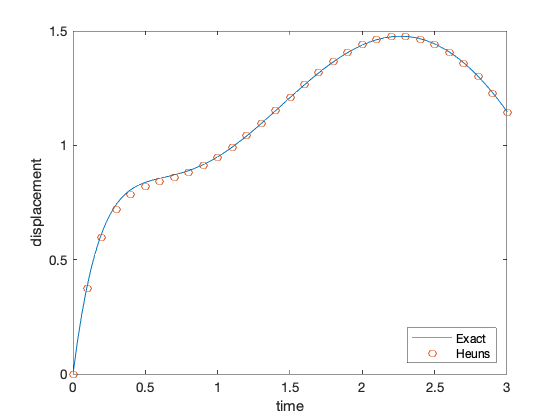

In [20]:
clear
% plot exact solution first
t = linspace(0, 3);
y_exact = -6*exp(-3*t) + 7*exp(-2*t) + sin(t) - cos(t);
plot(t, y_exact); hold on

omega = 1;

dt = 0.1;
t = [0 : dt : 3];

f = @(t,z1,z2) 10*sin(omega*t) - 5*z2 - 6*z1;

z1 = zeros(length(t), 1);
z2 = zeros(length(t), 1);
z1(1) = 0;
z2(1) = 5;
for i = 1 : length(t)-1
    % predictor
    z1p = z1(i) + z2(i)*dt;
    z2p = z2(i) + f(t(i), z1(i), z2(i))*dt;

    % corrector
    z1(i+1) = z1(i) + 0.5*dt*(z2(i) + z2p);
    z2(i+1) = z2(i) + 0.5*dt*(f(t(i), z1(i), z2(i)) + f(t(i+1), z1p, z2p));
end
plot(t, z1, 'o')
xlabel('time'); ylabel('displacement')
legend('Exact', 'Heuns', 'Location','southeast')

### Runge-Kutta: `ode45`

We can also solve using `ode45`, by providing a separate function file that defines the system of 1st-order ODEs. In this case, we'll need to use a single **array** variable, `Z`, to store $z_1$ and $z_2$. The first column of `Z` will store $z_1$ (`Z(:,1)`) and the second column will store $z_2$ (`Z(:,2)`).

In [10]:
%%file mass_spring.m
function dzdt = mass_spring(t, z)
    omega = 1;
    dzdt = zeros(2,1);
    
    dzdt(1) = z(2);
    dzdt(2) = 10*sin(omega*t) - 6*z(1) - 5*z(2);
end

Created file '/Users/kyle/projects/ME373/docs/mass_spring.m'.


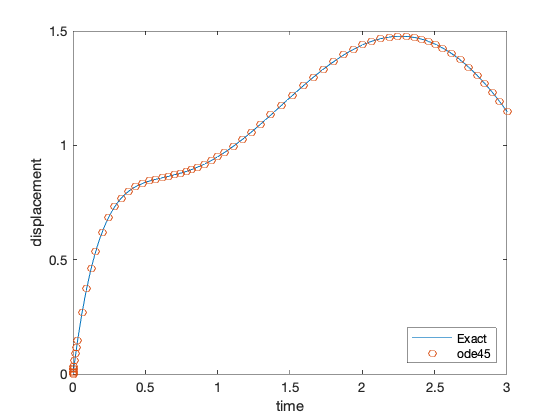

In [13]:
% plot exact solution first
t = linspace(0, 3);
y_exact = -6*exp(-3*t) + 7*exp(-2*t) + sin(t) - cos(t);
plot(t, y_exact); hold on

% solution via ode45:
[T, Z] = ode45('mass_spring', [0 3], [0 5]);

plot(T, Z(:,1), 'o')
xlabel('time'); ylabel('displacement')
legend('Exact', 'ode45', 'Location','southeast')